In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4959,4960,15784361,Williamson,543,Spain,Female,46,5,140355.60,1,1,1,85086.78,0
9936,9937,15653037,Parks,609,France,Male,77,1,0.00,1,0,1,18708.76,0
6322,6323,15684294,Chidumaga,735,France,Male,50,2,0.00,2,0,1,147075.69,0
5821,5822,15643188,Barnett,671,Germany,Female,47,7,114603.76,2,1,0,153194.32,1
7394,7395,15673747,Ayers,519,France,Female,22,8,0.00,1,0,1,167553.06,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['RowNumber',"CustomerId","Surname"],axis='columns',inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
null_rows_count = (df.isnull().any(axis=1)).sum()

print("Number of rows with at least one null value:", null_rows_count)

Number of rows with at least one null value: 0


In [9]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2748,401,Germany,Male,48,8,128140.17,1,1,0,175753.55,1
7435,610,Spain,Female,50,5,130554.51,3,1,0,184758.17,1
4050,803,Germany,Male,41,9,137742.90,2,1,1,166957.82,0
8168,597,Spain,Female,33,2,0.00,2,1,1,4700.66,0
5462,694,France,Female,29,5,99713.87,1,0,0,112317.89,0


In [12]:
def print_unique_col_values(df):
        for column in df:
           if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

In [13]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


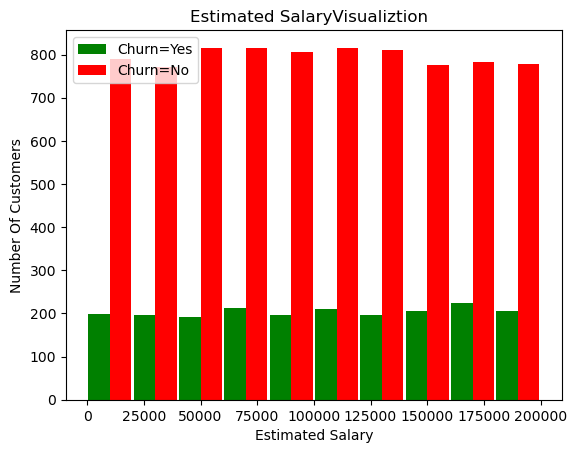

In [21]:
exited_salary=df[df['Exited'] == 1].EstimatedSalary
remained_salary=df[df['Exited'] == 0].EstimatedSalary

plt.xlabel("Estimated Salary")
plt.ylabel("Number Of Customers")
plt.title("Estimated SalaryVisualiztion  ")

plt.hist([exited_salary, remained_salary], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

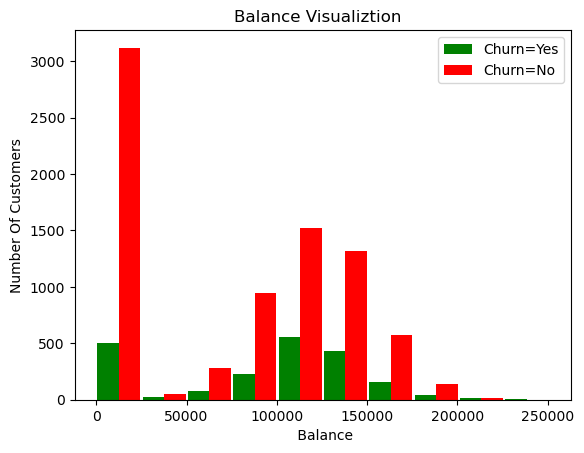

In [22]:
exited_salary=df[df['Exited'] == 1].Balance
remained_salary=df[df['Exited'] == 0].Balance

plt.xlabel(" Balance")
plt.ylabel("Number Of Customers")
plt.title("Balance Visualiztion  ")

plt.hist([exited_salary, remained_salary], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

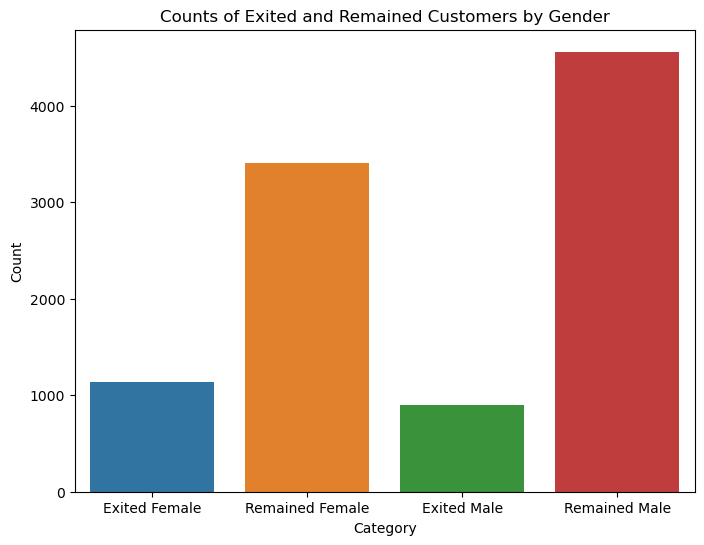

In [108]:
exited_female=df[(df['Exited'] == 1) & (df['Gender'] == 'Female' )]
remained_female=df[(df['Exited'] == 0) & (df['Gender'] == 'Female' )]
exited_male=df[(df['Exited'] == 1) & (df['Gender'] == 'Male' )]
remained_male=df[(df['Exited'] == 0) & (df['Gender'] == 'Male' )]

counts = {
    'Exited Female': len(exited_female),
    'Remained Female': len(remained_female),
    'Exited Male': len(exited_male),
    'Remained Male': len(remained_male)
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Exited and Remained Customers by Gender')
plt.show()

In [107]:
remained_male_count = len(df[(df['Exited'] == 0) & (df['Gender'] == 'Female')])
print("Number of males who remained:", remained_male_count)

Number of males who remained: 3404


In [24]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])

In [26]:
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [27]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
2931,638,37,7,124513.66,2,1,0,158610.89,0,1,0,0,1,0
1290,653,31,9,143321.97,1,1,0,83679.46,0,0,1,0,1,0
5827,653,35,9,0.00,2,1,1,45956.05,0,0,1,0,0,1
5880,537,28,0,88963.31,2,1,1,189839.93,0,0,1,1,0,0
6951,658,42,8,102870.93,1,0,1,103764.55,1,0,1,1,0,0


In [30]:
cols_to_scale = ['CreditScore','Tenure','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [28]:
def print_unique_col_values(df):
        for column in df:
            print(f'{column}: {df[column].unique()}')

In [32]:
print_unique_col_values(df1)

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [33]:
df2=df1
X = df2.drop(['Exited',],axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=df2[[ 'Exited']])

In [37]:
y_train_df=pd.DataFrame(y_train)
churn_0_rows = y_train_df[y_train_df['Exited'] == 0]
churn_1_rows = y_train_df[y_train_df['Exited'] == 1]
print(churn_0_rows.shape[0]/churn_1_rows.shape[0])

3.9079754601226995


In [38]:
y_test_df=pd.DataFrame(y_test)
churn_0_rows = y_test_df[y_test_df['Exited'] == 0]
churn_1_rows = y_test_df[y_test_df['Exited'] == 1]
print(churn_0_rows.shape[0]/churn_1_rows.shape[0])

3.914004914004914


In [39]:
len(X_train.columns)

13

In [157]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
     keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7744
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7985
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8020
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8099
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8116
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8156
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8179
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8167
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4177 - accuracy: 0.8216
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8224

In [158]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8725


[0.32201048731803894, 0.8725000023841858]

In [159]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.05431058],
       [0.02477795],
       [0.7163294 ],
       ...,
       [0.45801395],
       [0.04670186],
       [0.02056719]], dtype=float32)

In [160]:
y_pred=[]
for i in yp:
    if i<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
        

In [161]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1604
           1       0.75      0.53      0.62       396

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



Text(95.72222222222221, 0.5, 'Truth')

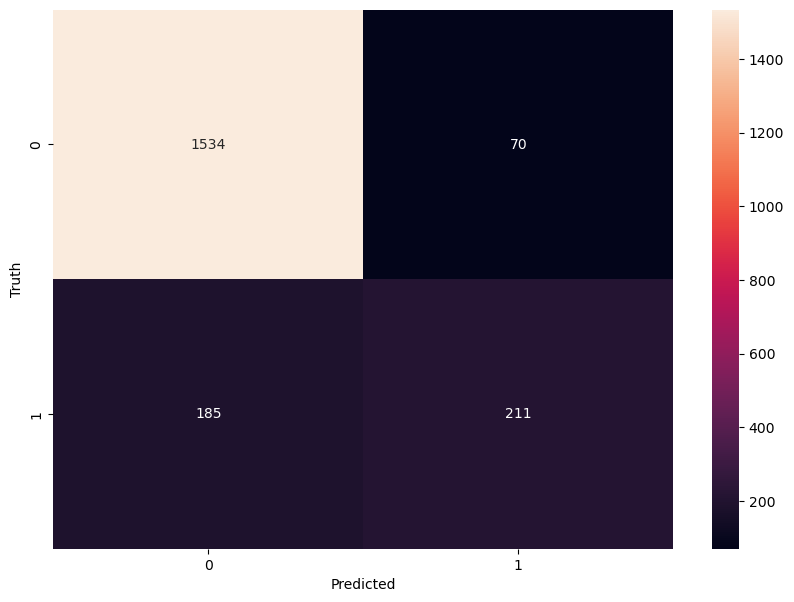

In [163]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [164]:
model.save('bank_churn_model')

INFO:tensorflow:Assets written to: bank_churn_model\assets


INFO:tensorflow:Assets written to: bank_churn_model\assets


model trained
63/63 [==============================] - 0s 1ms/step


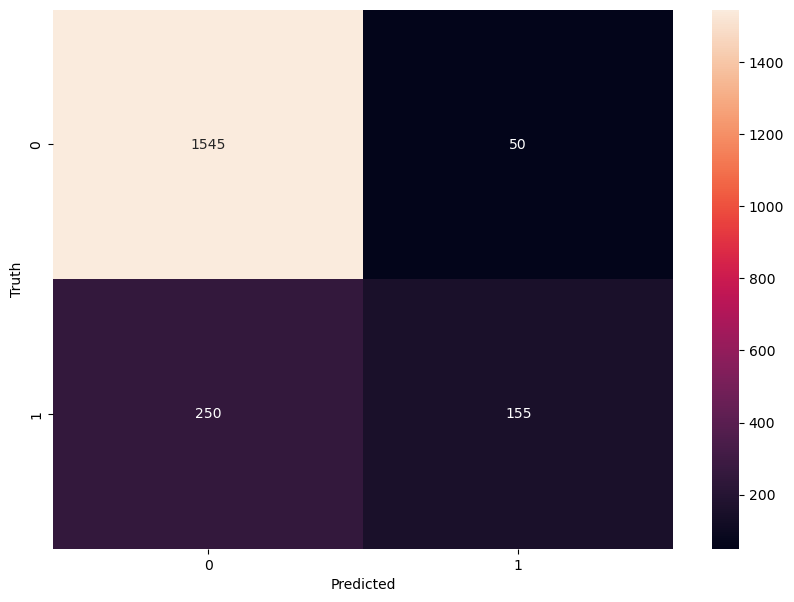

model trained
63/63 [==============================] - 0s 1ms/step


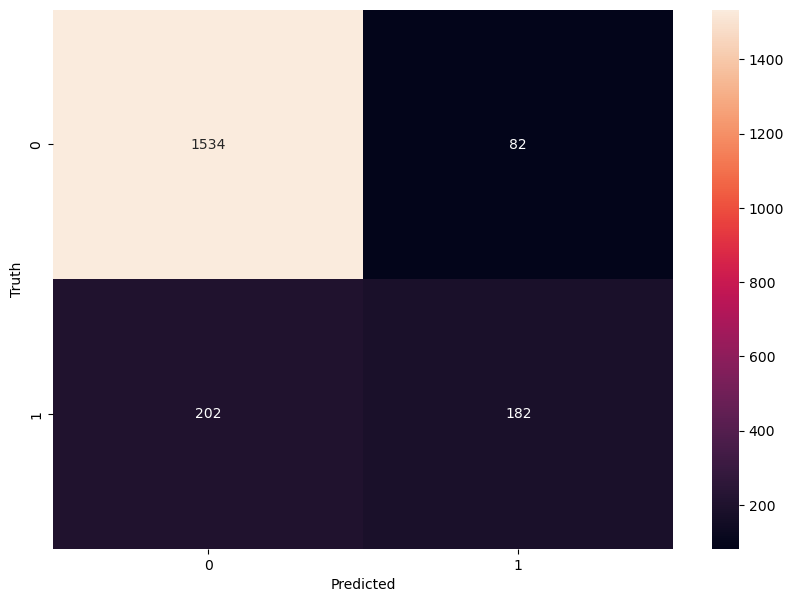

model trained
63/63 [==============================] - 0s 2ms/step


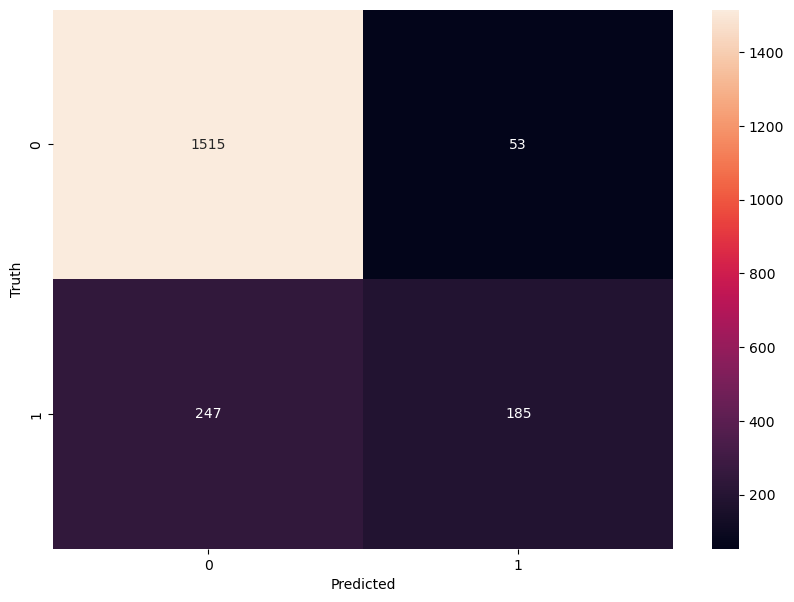

model trained
63/63 [==============================] - 0s 1ms/step


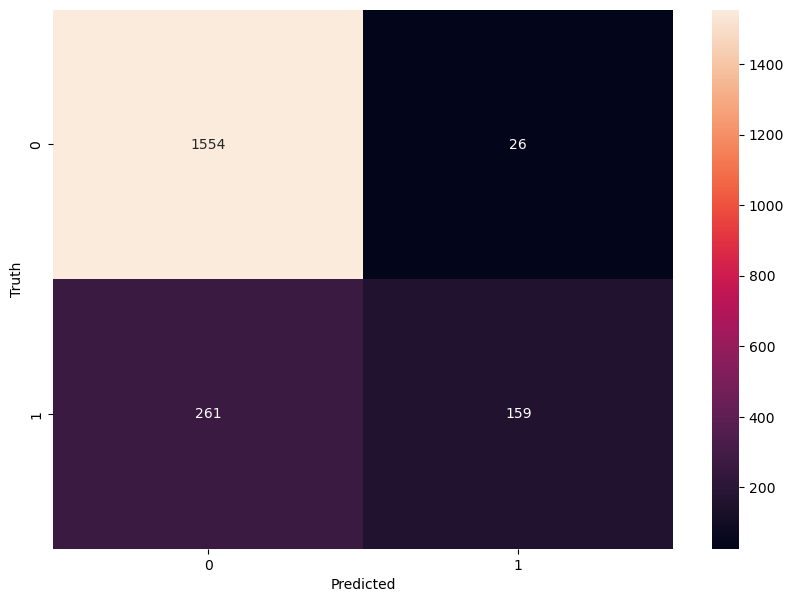

model trained
63/63 [==============================] - 0s 2ms/step


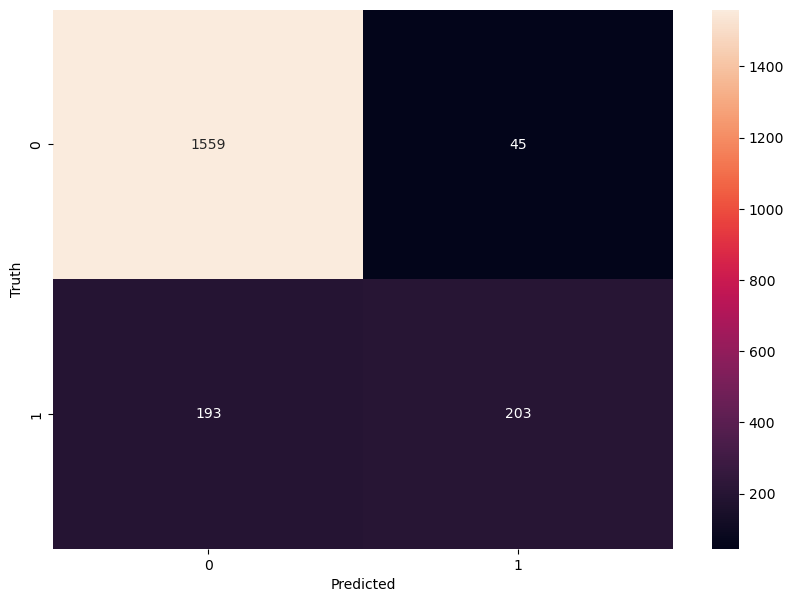

Mean accuracy: 0.8591000080108643


In [91]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Define your model
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

# Prepare your data
X = df1.drop(['Exited'], axis='columns')
y = df1['Exited']

# Perform k-fold cross-validation
cv_scores = []
for train_index, test_index in kfold.split(X):
   
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    print("model trained")
    # Predict using the model on the test data
    yp = model.predict(X_test)
    
    # Convert probabilities to binary predictions
    y_pred = [1 if p >= 0.5 else 0 for p in yp]
    
    # Calculate confusion matrix
    cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    
    # Evaluate the model on the test data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    cv_scores.append(accuracy)

# Calculate and print the mean accuracy of k-fold cross-validation
print("Mean accuracy:", np.mean(cv_scores))